### Supervised learning example: Iris classification

In [1]:
import seaborn as sns

In [2]:
iris=sns.load_dataset('iris')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#from sklearn.cross_validation import train_test_split #cross_validation was not used anymore
from sklearn.model_selection import train_test_split

In [5]:
X_iris=iris.drop('species',axis=1)
X_iris.shape

(150, 4)

In [6]:
y_iris=iris['species']
y_iris.shape

(150,)

In [7]:
Xtrain,Xtest, ytrain, ytest=train_test_split(X_iris,y_iris,random_state=1)

In [8]:
print(X_iris.shape)
print(y_iris.shape)
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(150, 4)
(150,)
(112, 4)
(38, 4)
(112,)
(38,)


### Bayesian theorem:
P(L | feature) * P(feature)=P(feature | L) * P(L)
--> P(L | feature)= (P(feature | L) * P(L)) / P(feature)

##### P(L) 標籤占比
##### P(feature | L) 標籤關聯
##### P(feature) 特徵氾濫程度 (渣度)

### if two labels:
##### since P(feature) = P(feature) on both sides, 
P(L1 | feature) / P(L2 | feature)= (P(feature | L1) * P(L1)) / (P(feature | L2) * P(L2))


##### generative model
hypothetical random process
##### naive
very naive assumption --> rough approximation 


### create Gaussian distribution blobs

In [9]:
from sklearn.datasets import make_blobs

In [10]:
make_blobs?
#Signature:
#make_blobs(
#    n_samples=100,
#    n_features=2,
#    centers=None, #The number of centers to generate, or the fixed center locations.
#    cluster_std=1.0,
#    center_box=(-10.0, 10.0),
#    shuffle=True,
#    random_state=None,
#)
#Docstring:
#Generate isotropic Gaussian blobs for clustering.

In [11]:
X, y=make_blobs(100,2,centers=2,random_state=2,cluster_std=1.5)

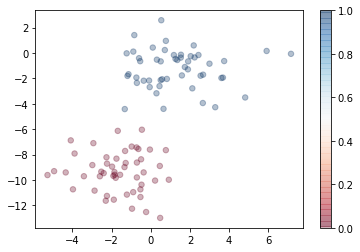

In [12]:
plt.scatter(X[:,0],X[:,1],c=y,s=30,cmap='RdBu',alpha=0.3)
plt.colorbar()

### fit

In [13]:
from sklearn.naive_bayes import GaussianNB

In [14]:
model = GaussianNB()

In [15]:
model.fit(X,y)

GaussianNB(priors=None, var_smoothing=1e-09)

### generate new data to predict

In [16]:
rng=np.random.RandomState(0)

In [17]:
Xnew=[-6,-14]+[14,18]*rng.rand(2000,2) #shift to the center
ynew=model.predict(Xnew)

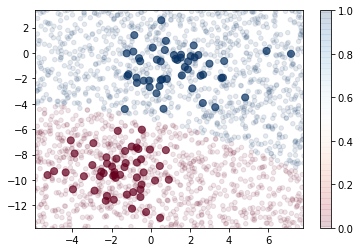

In [18]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='RdBu',alpha=0.7)
lim=plt.axis() #xmin, xmax, ymin, ymax = axis()
plt.scatter(Xnew[:,0],Xnew[:,1],c=ynew,s=20,cmap='RdBu',alpha=0.1)
plt.axis(lim) # let this plot follow the original boundary
plt.colorbar()

In [19]:
plt.axis?

In [32]:
Xnew[:20,]

array([[  1.68338905,  -1.12659141],
       [  2.43868727,  -4.19210271],
       [ -0.06883281,  -2.37390596],
       [  0.12622096,   2.05191401],
       [  7.49127865,  -7.09805266],
       [  5.08415053,  -4.47989144],
       [  1.95262386,   2.66073949],
       [ -5.00549519, -12.43167261],
       [ -5.71694244,   0.98715722],
       [  4.89419451,   1.66021867],
       [  7.70065679,   0.38485416],
       [  0.46071107,   0.04952517],
       [ -4.34415804,  -2.48142162],
       [ -3.99305398,   3.00404051],
       [  1.3058765 ,  -6.53608508],
       [ -2.29622143,  -0.06379359],
       [  0.38610465,  -3.76818892],
       [ -5.73694279,  -2.88256105],
       [  2.56934012,  -2.89518806],
       [  7.2124731 ,  -1.72723462]])

In [39]:
yprob=model.predict_proba(Xnew)
yprob.round(2)

array([[0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       ...,
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

### visualize the boundary of uncertainty

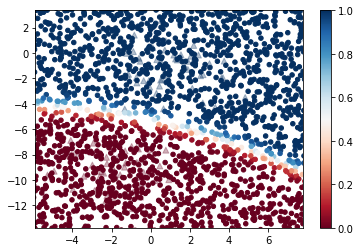

In [41]:
plt.scatter(X[:,0],X[:,1],c=y,marker='^',cmap='RdBu',alpha=0.3)
lim=plt.axis() #xmin, xmax, ymin, ymax = axis()
plt.scatter(Xnew[:,0],Xnew[:,1],c=yprob[:,1],s=20,cmap='RdBu',alpha=1)
plt.axis(lim) # let this plot follow the original boundary
plt.colorbar()

In [57]:
idx=np.where( (yprob[:,0]<0.9) & (yprob[:,0]>0.1))

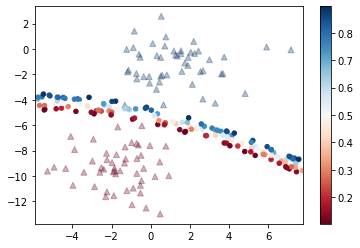

In [58]:
plt.scatter(X[:,0],X[:,1],c=y,marker='^',cmap='RdBu',alpha=0.3)
lim=plt.axis() #xmin, xmax, ymin, ymax = axis()
plt.scatter(Xnew[idx,0],Xnew[idx,1],c=yprob[idx,1],s=20,cmap='RdBu',alpha=1)
plt.axis(lim) # let this plot follow the original boundary
plt.colorbar()

In [63]:
print(model.theta_) #mean of each feature per class
print(model.sigma_) #variance 
print(model.epsilon_) #absolute additive value to variances

[[-1.64939095 -9.36891451]
 [ 1.29327924 -1.24101221]]
[[2.06097005 2.47716872]
 [3.33164807 2.22401384]]
1.8866290187129306e-08


### 3 groups

In [66]:
X3, y3=make_blobs(150,2,centers=3,random_state=43,cluster_std=1.5)

In [67]:
X3.shape

(150, 2)

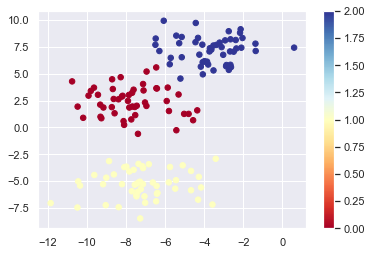

In [78]:
sns.set()
plt.scatter(X3[:,0],X3[:,1],c=y3,s=30,cmap='RdYlBu')
plt.colorbar()

In [79]:
model3 = GaussianNB()

In [80]:
model3.fit(X3,y3)

GaussianNB(priors=None, var_smoothing=1e-09)

In [81]:
print(model3.theta_) #mean of each feature per class
print(model3.sigma_) #variance 
print(model3.epsilon_) #absolute additive value to variances

[[-7.71743775  2.3993856 ]
 [-7.17249583 -5.29502721]
 [-3.63576462  7.20065699]]
[[2.41709685 1.85860732]
 [3.27217136 1.70182215]
 [2.09641268 1.49071503]]
2.817241689232876e-08


In [87]:
X3new=[-12,-8]+[14,18]*rng.rand(2000,2)
y3new=model3.predict(X3new)

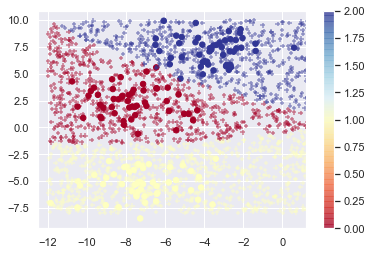

In [92]:
plt.scatter(X3[:,0],X3[:,1],c=y3,s=30,cmap='RdYlBu',alpha=1)
lim=plt.axis() #xmin, xmax, ymin, ymax = axis()
plt.scatter(X3new[:,0],X3new[:,1],c=y3new,s=20,cmap='RdYlBu',alpha=0.5,marker='+')
plt.axis(lim) # let this plot follow the original boundary
plt.colorbar()

In [93]:
y3prob=model3.predict_proba(X3new)

In [103]:
y3prob[:10,].round(2)

array([[0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.07, 0.93, 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.05, 0.  , 0.95],
       [0.96, 0.  , 0.04],
       [0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ]])

In [130]:
idx0=np.where(y3new==0)
idx1=np.where(y3new==1)
idx2=np.where(y3new==2)

In [129]:
len(idx0[0])

668

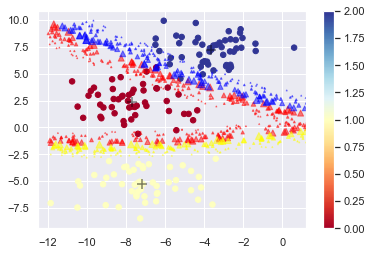

In [142]:
plt.scatter(X3[:,0],X3[:,1],c=y3,s=30,cmap='RdYlBu',alpha=1)
plt.colorbar()
lim=plt.axis() #xmin, xmax, ymin, ymax = axis()
plt.scatter(X3new[idx0,0],X3new[idx0,1],c='red',s=100*(1-y3prob.round(2)[idx0,0]),alpha=0.5,marker='^')
plt.scatter(X3new[idx1,0],X3new[idx1,1],c='yellow',s=100*(1-y3prob.round(2)[idx1,1]),alpha=0.5,marker='^')
plt.scatter(X3new[idx2,0],X3new[idx2,1],c='blue',s=100*(1-y3prob.round(2)[idx2,2]),alpha=0.5,marker='^')
plt.axis(lim) # let this plot follow the original boundary
plt.scatter(model3.theta_[:,0],model3.theta_[:,1],s=100,alpha=0.5,c='black',marker='+')